# Mapas Auto organizáveis de Kohonen

# **Vamos começar!**
Baixar no UCI Machine Learning Repository um repositório de sua escolha **.csv*. Como exemplo, na pasta /solucoes temos uma SOM para análise química de vinhos cultivados na mesma região da Itália, vamos preparar nosso ambiente com as bibliotecas necessárias e depois importaremos os dados!

## Importando as bibliotecas

In [1]:
# instalar a biblioteca <minsom> *no Anaconda Prompt digite <> pip install minisom
from minisom import MiniSom  
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('wines.csv')

### Camada de entrada e rótulos para validação

In [17]:
base.head(200)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
base.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Carregando os dados

In [6]:
X = base.iloc[:,1:14].values
y = base.iloc[:,0].values

### Normalização dos dados

In [7]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

### Construção do SOM

O algoritmo de Kohonen foi desenvolvido por Teuvo Kohonen em 1982, sendo considerado relativamente simples e com a capacidade de organizar dimensionalmente dados complexos em grupos (clusters), de acordo com suas relações. Este método solicita apenas os parâmetros de entrada, mostrando-se ideal para problemas onde os padrões são desconhecidos ou indeterminados.
<a href='https://pt.wikipedia.org/wiki/Mapas_de_Kohonen#/media/Ficheiro:TrainSOM.gif'>  <img src='440px-TrainSOM.gif' /></a>


In [8]:
som = MiniSom(x = 10, y = 10, input_len = 13, sigma = 1.0, learning_rate = 0.9, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100000)

#### Topologia da Rede

Os SOMs  têm duas camadas, a primeira é a camada de entrada e a segunda é a camada de saída ou o mapa de características. Ao contrário de outros tipos de RNA, SOM não tem função de ativação em neurônios, passamos pesos diretamente para a camada de saída sem fazer nada. Cada neurônio em um SOM é atribuído a um vetor de peso com a mesma dimensionalidade d do espaço de entrada. <a href='https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b'> <img src='Mapa.png'/> </a>

In [9]:
som._activation_map

array([[1.22538364, 1.03003761, 1.17473363, 1.22136702, 0.91586352,
        0.73673057, 0.63856531, 0.49197628, 0.41342832, 0.45560203],
       [1.09613666, 1.31694012, 1.21376331, 1.26388518, 0.84185765,
        0.69203331, 0.61903705, 0.68263436, 0.50877915, 0.02168895],
       [1.31517609, 1.38941665, 1.30512404, 1.56474375, 1.07184867,
        0.87851983, 0.64203335, 0.69713161, 0.64716031, 0.58103107],
       [1.39322468, 1.42533009, 1.47036812, 1.23268846, 1.39751908,
        1.0563461 , 0.8800464 , 0.74305553, 0.59973393, 0.83897502],
       [1.28950231, 1.39654889, 1.34564207, 1.36071959, 1.47397004,
        0.96094565, 0.67044911, 0.82473836, 0.65413795, 0.80077821],
       [1.67273915, 1.49425635, 1.4164412 , 1.52995842, 1.61304177,
        1.5263213 , 1.03894464, 0.88164449, 0.89289776, 1.0501111 ],
       [1.37002838, 1.1845554 , 1.54280601, 1.85714621, 1.89358989,
        1.55830606, 1.6802781 , 1.46701571, 1.48863485, 1.56323812],
       [1.60151101, 1.48343332, 1.5380000

#### Pesos do SOM

In [10]:
som._weights

array([[[0.3369704 , 0.19982683, 0.27639856, ..., 0.58306901,
         0.69366651, 0.26692209],
        [0.51764488, 0.06218123, 0.20737729, ..., 0.5295601 ,
         0.69618877, 0.16510391],
        [0.25081934, 0.07118012, 0.50974371, ..., 0.41800279,
         0.68243341, 0.4233637 ],
        ...,
        [0.74903038, 0.23703748, 0.51882957, ..., 0.56827074,
         0.64884563, 0.87812521],
        [0.82256951, 0.19619667, 0.56966455, ..., 0.49338154,
         0.59273498, 0.83695591],
        [0.97151286, 0.19586443, 0.55106537, ..., 0.62132067,
         0.53865756, 0.63367927]],

       [[0.35230214, 0.07473446, 0.40904229, ..., 0.53334976,
         0.57371249, 0.18372935],
        [0.33565285, 0.06095401, 0.39154402, ..., 0.6538034 ,
         0.65448479, 0.07076544],
        [0.17456907, 0.09351003, 0.6932217 , ..., 0.35175265,
         0.70891372, 0.25163513],
        ...,
        [0.67540831, 0.19773617, 0.58544208, ..., 0.41235475,
         0.65394846, 0.60741678],
        [0.7

## Visualizção dos Dados

### Visualização de quantas vezes determinado neurônio foi ativado

**Competição:**
Como dissemos antes, a cada neurônio em um SOM é atribuído um vetor de peso com a mesma dimensionalidade do espaço de entrada.
No exemplo abaixo, em cada neurônio da camada de saída teremos um vetor com dimensão n.
Calculamos a distância entre cada neurônio (neurônio da camada de saída) e os dados de entrada, e o neurônio com a menor distância será o vencedor da competição. 

A métrica euclidiana ***dj*** é comumente usada para medir distâncias: $$\ d_j =\sum_{i=1}^n(x_i-w_{ij})^2$$

<a href=https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065> <img src='competicao.png'/> </a>


In [11]:
q = som.activation_response(X)
q

array([[3., 1., 1., 1., 1., 2., 2., 2., 3., 1.],
       [2., 3., 2., 1., 1., 2., 3., 1., 3., 1.],
       [1., 2., 3., 1., 2., 4., 2., 4., 3., 1.],
       [1., 2., 1., 1., 2., 1., 2., 2., 1., 1.],
       [2., 4., 3., 2., 1., 1., 1., 1., 3., 1.],
       [1., 1., 1., 1., 1., 1., 2., 3., 2., 1.],
       [1., 2., 1., 2., 1., 1., 2., 1., 1., 1.],
       [1., 2., 1., 5., 1., 1., 2., 3., 1., 1.],
       [3., 1., 1., 2., 2., 2., 1., 3., 3., 3.],
       [1., 1., 4., 3., 3., 1., 2., 3., 1., 1.]])


### MID - distância média entre neurônios

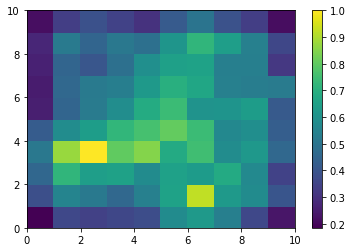

In [12]:
from matplotlib.pylab import pcolor, colorbar, plot, plt
pcolor(som.distance_map().T)
# MID - mean inter neuron distance
colorbar()

### Regiões de ativação (classe)

In [13]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

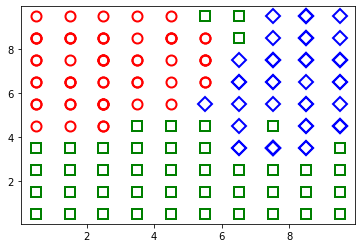

In [14]:
for i, x in enumerate(X):
    #print(i)
    #print(x)
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)

In [15]:
w = som.winner(X[148])  #Características do vinho da 3 linha do dataset ativa o neurônio representado pelos índices de w
print(w)

(8, 7)


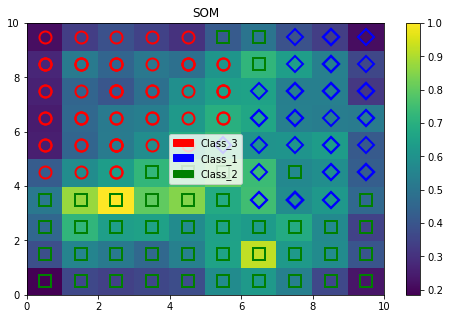

In [16]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Class_3')
blue_patch = mpatches.Patch(color='blue', label='Class_1')
green_patch = mpatches.Patch(color='green', label='Class_2')


plt.figure(figsize=(8,5))
plt.title('SOM')
plt.pcolor(som.distance_map().T) # Mapa de distância como background
plt.colorbar()

for cnt,xx in enumerate(X):
    w = som.winner(xx) # Definindo o neurônio
    plt.plot(w[0]+.5,w[1]+.5,markers[y[cnt]],markerfacecolor='None',
             markeredgecolor=color[y[cnt]],markersize=12,markeredgewidth=2)
    
plt.axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch,green_patch])
plt.show() 